In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [10]:
df=pd.read_csv('dataset/movie_metadata.csv')
#df = df.dropna()
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


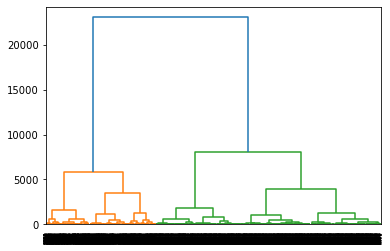

In [11]:
from sklearn.preprocessing import OrdinalEncoder
from datetime import datetime
import time
encoder = OrdinalEncoder()
df[['genres']] = encoder.fit_transform(df[['genres']])
use = df.loc[:, ['genres','imdb_score',]].values
start = time.time()
dendrogram = sch.dendrogram(sch.linkage(use, method='ward'))
final = time.time()

In [12]:
print("Hierarchical Agglomerative Clustering Time: ", final-start)

Hierarchical Agglomerative Clustering Time:  7.530751943588257


In [13]:
from sklearn.neighbors import NearestCentroid
#start = time.time()
graph = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cgraph = graph.fit_predict(use)
labels = graph.labels_
final = time.time()
print("Hierarchical Agglomerative Clustering Time: ", final-start)

Hierarchical Agglomerative Clustering Time:  197.08382368087769


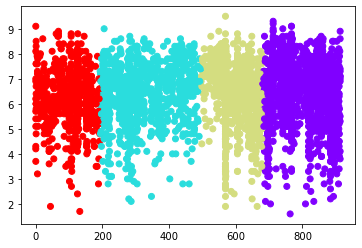

In [120]:
plt.scatter(use[:,0],use[:,1], c=labels, cmap='rainbow')

In [121]:
from sklearn.neighbors import NearestCentroid
nct = NearestCentroid()
nct.fit(use, cgraph)
centroids = nct.centroids_
print("Centroids X-axis:")
print(centroids[:,0])
print("Centroids Y-axis: ")
print(centroids[:,1])

Centroids X-axis:
[797.69052224 313.33433134 598.07733131 104.37308869]
Centroids Y-axis: 
[6.53916828 6.36616766 6.43388931 6.26834862]
